# Simulate and Explore Transaction Data

Imagine you're working at a fintech company called SecureBank, and your job is to detect potentially fraudulent transactions using machine learning. You've built a simulated dataset that reflects real-world customer transactions. Each row represents one transaction, and each column captures key characteristics of that transaction. Here's what each feature represents:

**Amount:** The dollar value of the transaction. Fraudulent transactions often involve unusually large amounts compared to regular behavior.

**TransactionTime:** The time of day the transaction occurred, measured in hours from 0 to 24. Fraudulent activity sometimes spikes during off-peak hours.

**CustomerAge:** The age of the customer who made the transaction. While not a direct indicator, age can interact with other features to help distinguish normal from suspicious patterns.

**IsInternational:** Indicates whether the transaction was made from outside the customer’s home country. International transactions tend to carry a higher risk of fraud, especially if the customer typically makes domestic transactions.

The **Label** column is the target variable and is used only for evaluation. It marks each transaction as either legitimate (0) or fraudulent (1). This allows us to assess how well our model performs in detecting true anomalies.

In real-world applications, such as fraud detection or cybersecurity monitoring, labels are often unavailable during training. That’s why we use unsupervised models like Isolation Forest, which don’t need labeled data and can still identify rare and suspicious patterns. Once deployed, this system can flag risky transactions in real time for manual review or automatic intervention.

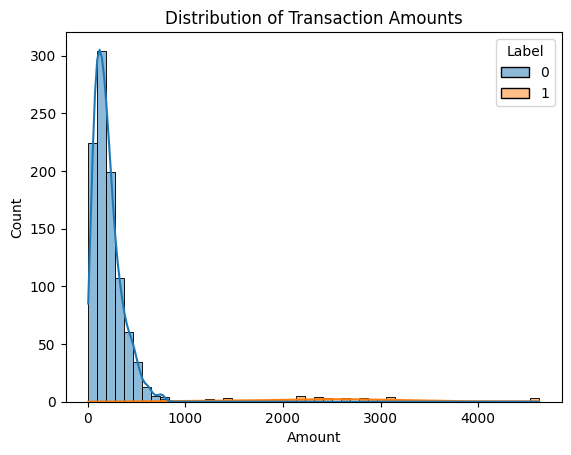

Fraud rate in dataset: 0.05


,Amount,TransactionTime,CustomerAge,IsInternational,Label
0,239.367939,12.303714,21.540203,0,0
1,149.446473,7.327456,39.078768,0,0
2,138.228358,5.103465,39.525314,0,0
3,138.230229,0.796545,20.995804,0,0
4,464.971441,7.294714,37.067748,1,0


In [ ]:
# SECTION 1: Simulate and Explore Financial Transaction Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed
np.random.seed(42)

# Simulate normal transactions
n_normal = 950
normal_data = {
    "Amount": np.random.gamma(2, 100, n_normal),  # Most transactions are small
    "TransactionTime": np.random.uniform(0, 24, n_normal),  # Time of day (in hours)
    "CustomerAge": np.random.normal(35, 10, n_normal),  # Mean age ~35
    "IsInternational": np.random.choice([0, 1], n_normal, p=[0.9, 0.1])
}

# Simulate fraudulent transactions (anomalies)
n_fraud = 50
fraud_data = {
    "Amount": np.random.gamma(9, 300, n_fraud),  # Much larger transactions
    "TransactionTime": np.random.uniform(0, 24, n_fraud),
    "CustomerAge": np.random.normal(50, 15, n_fraud),  # Slightly older average
    "IsInternational": np.random.choice([0, 1], n_fraud, p=[0.3, 0.7])
}

# Combine into one dataset
df_normal = pd.DataFrame(normal_data)
df_fraud = pd.DataFrame(fraud_data)
df = pd.concat([df_normal, df_fraud], ignore_index=True)
df["Label"] = [0]*n_normal + [1]*n_fraud  # 0 = normal, 1 = fraud

# Visualize distribution
sns.histplot(data=df, x="Amount", hue="Label", bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

print("Fraud rate in dataset:", df["Label"].mean())
df.head()


# Build and Evaluate an Isolation Forest Model

In fraud detection, we’re often looking for rare, unusual transactions that stand out from typical customer behavior. These events are known as anomalies — and they usually make up a very small fraction of the total dataset. Traditional supervised learning models, like logistic regression or decision trees, require labeled data for both fraud and non-fraud cases. But in practice, labeled fraudulent transactions are hard to obtain and may not reflect new types of fraud that haven’t been seen before.

This is where Isolation Forest becomes a powerful tool.

**Unsupervised: **Isolation Forest doesn't need labeled data. It can find patterns of normal behavior and then identify transactions that don't fit those patterns.

**Efficient with High-Dimensional Data:** Unlike clustering methods that struggle in high-dimensional spaces, Isolation Forest handles multiple features well and scales efficiently.

**Built for Anomaly Detection:** The algorithm works by randomly partitioning the data. Anomalies are easier to isolate and require fewer splits. This makes the model naturally suited for identifying outliers.

**Robust to Imbalanced Classes:** In fraud detection, the number of fraudulent cases is typically much smaller than the number of legitimate ones. Isolation Forest is specifically designed to deal with this imbalance without requiring any special tuning or resampling.

**Interpretability:** While not as transparent as a linear model, Isolation Forest still provides a clear score indicating how "anomalous" each transaction is. You can sort transactions by this score and investigate the most suspicious ones first.

In short, Isolation Forest is a practical, scalable, and highly effective method when you have large amounts of unlabeled transaction data and need to catch the rare but costly anomalies.

In [ ]:
# SECTION 2: Anomaly Detection with Isolation Forest
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Drop labels and scale features
X = df.drop(columns=["Label"])
y_true = df["Label"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
preds = model.predict(X_scaled)
y_pred = np.where(preds == -1, 1, 0)

# Evaluate
print("Classification Report for Isolation Forest (Anomaly Detection):")
print(classification_report(y_true, y_pred, target_names=["Normal", "Fraud"]))


Classification Report for Isolation Forest (Anomaly Detection):
              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99       950
       Fraud       0.90      0.90      0.90        50

    accuracy                           0.99      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.99      0.99      0.99      1000



## Review Questions

1. **Which type of model is used to estimate rewards in this notebook?**

   A. Logistic regression  
   B. Linear regression with context features  
   C. Random forest  
   D. Neural network  

2. **What information is used as input to the model when choosing an action?**

   A. Only past rewards  
   B. Only the action index  
   C. Context (feature vector) observed at each time step  
   D. Product prices  

3. **How does the model estimate the expected reward for an arm?**

   A. By averaging all past rewards  
   B. By multiplying the context vector by learned coefficients  
   C. By sampling randomly  
   D. By using a lookup table  

4. **What quantity is added to the predicted reward to encourage exploration?**

   A. Noise drawn from a normal distribution  
   B. A fixed constant  
   C. An uncertainty or confidence bonus  
   D. A penalty term  

5. **What is plotted to evaluate how the model performs over time?**

   A. Classification accuracy  
   B. Model loss  
   C. Cumulative reward (or cumulative regret)  
   D. Feature importance  

